# USAID-Kenya-Sentiment-Analysis

### Extracting Data From X/Tweeter API (Tweepy)

In [1]:
!pip install --user tweepy



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import tweepy

# # Bearer token given

# # Initialize the Twitter client
# client = tweepy.Client(bearer_token=BEARER_TOKEN)

# # Query includes retweets, multiple keywords, and allows any language
# query = '(USAID OR "foreign aid" OR "funding cuts" OR "cut USAID funding" OR "cutting USAID" OR "halted USAID support" OR "cut funding" OR "usaid budget cuts" OR "NGO funding" OR "Africa aid" OR "USAID gets shut" OR "Trump cuts usaid" OR "USAID money" OR "aid withdrawal" OR "end of USAID" OR "Trump Cuts Aid To Africa" OR NGOs funding) (Kenya OR Nairobi)'

# # Fetch recent tweets (up to 100 at a time, max 7 days old)
# response = client.search_recent_tweets(query=query, max_results=100)

# # Print the tweets
# if response.data:
#     for tweet in response.data:
#         print(tweet.text)
# else:
#     print("No tweets found.")

## Extracting Data From Reddit API (PRAW)

In [3]:
!pip install praw



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(se

## Subreddits used Kenya and Nairobi

Used the following keywords "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya", 
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors","end of USAID","Trump Cuts Aid To Africa","NGOs"
    
    
Used KENYA and NAIROBI subreddits only   

After extracting data using the initial keywords and the two subreddits, I was only able to retrieve 3 rows with 9 columns. Due to the limited amount of data obtained, I gradually expanded the other codes by adding more subreddits and keywords to increase the volume of data collected.

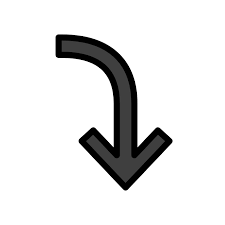

In [4]:
import praw
import pandas as pd
from datetime import datetime

# Reddit API client
reddit = praw.Reddit(
    client_id='f6MuemGIIpuv8csr3CpuzQ',
    client_secret='rSPUbtIsCzfYWW3Lf9mnR330gX7FCA',
    user_agent='USAID-Ke-Prac'
)

# Added more subreddits
keywords = [
    "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya", 
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors","end of USAID","Trump Cuts Aid To Africa","NGOs"
]

relevant_subreddits = ["Kenya","Nairobi"]

# the cutoff date
CUTOFF_DATE = datetime(2025, 1, 1)  

def search_reddit(subreddits, limit=100):
    posts = []
    
    for subreddit_name in subreddits:
        try:
            subreddit = reddit.subreddit(subreddit_name)
            for submission in subreddit.search("USAID OR Kenya OR aid", limit=limit, sort="new"):
                post_date = datetime.utcfromtimestamp(submission.created_utc)
                
                # Skip posts before the cutoff date
                if post_date < CUTOFF_DATE:
                    continue
                
                title_lower = submission.title.lower()
                selftext_lower = submission.selftext.lower()
                matched_keywords = [kw for kw in keywords if kw.lower() in title_lower or kw.lower() in selftext_lower]
                
                if matched_keywords:
                    posts.append({
                        'subreddit': subreddit_name,
                        'keyword': matched_keywords[0],
                        'title': submission.title,
                        'text': submission.selftext,
                        'date_posted': post_date.strftime('%Y-%m-%d %H:%M:%S'),
                        'score': submission.score,
                        'url': submission.url,
                        'permalink': f"https://reddit.com{submission.permalink}",
                        'upvotes': submission.score,
                        'comments': submission.num_comments
                    })
        except Exception as e:
            print(f"Skipped r/{subreddit_name}: {e}")
    
    return pd.DataFrame(posts)

df_reddit = search_reddit(relevant_subreddits, limit=300)
print(f"Found {len(df_reddit)} relevant posts after {CUTOFF_DATE}")
df_reddit.head(50)

Found 2 relevant posts after 2025-01-01 00:00:00


,subreddit,keyword,title,text,date_posted,score,url,permalink,upvotes,comments
0,Nairobi,USAID,Theres always someone out there worse off than...,I was talking to my South Sudanese friend yest...,2025-05-12 23:28:50,81,https://www.reddit.com/r/nairobi/comments/1kl7...,https://reddit.com/r/nairobi/comments/1kl7bcm/...,81,53
1,Nairobi,aid withdrawal,What steps are you taking to keep your busines...,"Let's face it, since last year August; a lot o...",2025-04-14 09:54:50,7,https://www.reddit.com/r/nairobi/comments/1jyv...,https://reddit.com/r/nairobi/comments/1jyv2tj/...,7,4


In [5]:
df_reddit.shape

(2, 10)

### Subreddits used Kenya, Nairobi, Africa

Used more keywords i.e  "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya", 
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors", "end of USAID", "Trump Cuts Aid To Africa", "NGOs"
    
    
Subreddits used "Kenya", "Nairobi","Africa" added Africa subreddit to the other subreddits.    

After expanding the list of keywords and subreddits, I was able to collect a larger dataset compared to the initial one, totaling 29 rows and 9 columns. While this marked an improvement in size, the dataset was still too small to support any meaningful analysis. As a result, I further refined the keywords and subreddits more to improve data quality and quantity.

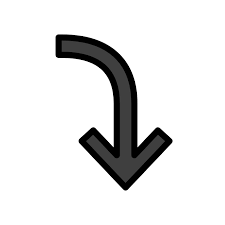

In [6]:
import praw
import pandas as pd
from datetime import datetime

# Reddit API Setup
reddit = praw.Reddit(
    client_id='f6MuemGIIpuv8csr3CpuzQ',
    client_secret='rSPUbtIsCzfYWW3Lf9mnR330gX7FCA',
    user_agent='USAID-Kenya-Aid-Analysis'
)

# Kenya-Specific Keywords
keywords = [
    "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya", 
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors", "end of USAID", "Trump Cuts Aid To Africa", "NGOs"
]

# subreddits
relevant_subreddits = ["Kenya", "Nairobi","Africa"]  

# Cutoff date
CUTOFF_DATE = datetime(2025, 1, 1) 

def search_reddit_kenya(subreddits, limit=100):
    posts = []
    
    for subreddit_name in subreddits:
        try:
            subreddit = reddit.subreddit(subreddit_name)
            # Search for "Kenya + aid" in subreddits
            for submission in subreddit.search("Kenya AND (USAID OR aid OR funding)", limit=limit, sort="new"):
                post_date = datetime.utcfromtimestamp(submission.created_utc)
                
                # Skip posts before the cutoff date
                if post_date < CUTOFF_DATE:
                    continue
                
                # Check for Kenya-specific keywords in title/text
                content = f"{submission.title} {submission.selftext}".lower()
                matched_keywords = [kw for kw in keywords if kw.lower() in content]
                
                if matched_keywords:
                    posts.append({
                        'subreddit': subreddit_name,
                        'keyword': ", ".join(matched_keywords),
                        'title': submission.title,
                        'text': submission.selftext,
                        'date_posted': post_date.strftime('%Y-%m-%d'),
                        'upvotes': submission.score,
                        'comments': submission.num_comments,
                        'url': submission.url,  # Direct URL to linked content
                        'permalink': f"https://reddit.com{submission.permalink}"  # Link to Reddit discussion
                    })
        except Exception as e:
            print(f"Error in r/{subreddit_name}: {e}")
    
    return pd.DataFrame(posts)

# Run search
df_kenya = search_reddit_kenya(relevant_subreddits, limit=200)
print(f"Found {len(df_kenya)} Kenya-focused posts after {CUTOFF_DATE.date()}")



# Save to CSV
if not df_kenya.empty:
    output_filename = f"C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/cecilia.reddit_nbo_ke_africa.csv"
    df_kenya.to_csv(output_filename, index=False, encoding='utf-8')
    print(f"Results saved to {output_filename}")
    
df_kenya.head()    

Found 25 Kenya-focused posts after 2025-01-01
Results saved to C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/cecilia.reddit_nbo_ke_africa.csv


,subreddit,keyword,title,text,date_posted,upvotes,comments,url,permalink
0,Kenya,donors,Dear Gentle Readers,Good morning my gentle readers\n\nToday I have...,2025-05-30,64,74,https://www.reddit.com/r/Kenya/comments/1kyxeb...,https://reddit.com/r/Kenya/comments/1kyxebr/de...
1,Kenya,USAID,USAID Repercussions + Economy,My neighbour’s wife was a very big shot in USA...,2025-05-14,13,33,https://www.reddit.com/r/Kenya/comments/1kmhn8...,https://reddit.com/r/Kenya/comments/1kmhn87/us...
2,Kenya,Trump cuts,Bill Gates 'horrified' by Trump cuts to US aid...,,2025-05-08,1,1,https://www.semafor.com/article/05/08/2025/bil...,https://reddit.com/r/Kenya/comments/1khpakg/bi...
3,Kenya,"foreign aid, foreign aid",Foreign aid/Philanthropy,I see the aid or philanthropic activities that...,2025-04-27,1,0,https://www.reddit.com/r/Kenya/comments/1k91v5...,https://reddit.com/r/Kenya/comments/1k91v58/fo...
4,Kenya,USAID,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,2025-04-15,3,5,https://www.reddit.com/r/Kenya/comments/1jzrn2...,https://reddit.com/r/Kenya/comments/1jzrn2s/us...


In [7]:
df_kenya.shape

(25, 9)

## Subreddits used Kenya,Nairobi,Africa,WorldNews,Geopolitics,InternationalDev, Humanitarian,Development,Politics,AskConservatives and News

Readjusted some keywords and used the following "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya", 
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors", "end of USAID Kenya", "Trump Cuts Aid To Africa", "NGOs","USAID exit Kenya","USAID Repercussions"
    
    
Subreddits used  "Kenya", "Nairobi", "Africa", "worldnews", "geopolitics",
    "InternationalDev", "humanitarian", "globalhealth", "development",'politics','AskConservatives','news'
    
    
After broadening the scope of subreddits and keywords, I was able to collect a significantly larger dataset with 251 rows and 9 columns—providing a more sustainable and reliable foundation for meaningful analysis.

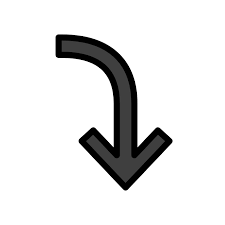

In [8]:
import praw
import pandas as pd
from datetime import datetime

# Reddit API Setup
reddit = praw.Reddit(
    client_id='f6MuemGIIpuv8csr3CpuzQ',
    client_secret='rSPUbtIsCzfYWW3Lf9mnR330gX7FCA',
    user_agent='USAID-Kenya-Aid-Analysis'
)

# Expanded Kenya-Specific Keywords
keywords = [
   "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya", 
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal","usaid kenya"
    "State Department cuts", "end of USAID Kenya", "Trump Cuts Aid To Africa", "NGOs","USAID exit Kenya","USAID Repercussions"
]
# Expanded subreddits list
relevant_subreddits = [
    "Kenya", "Nairobi", "Africa", "worldnews", "geopolitics",
    "InternationalDev", "humanitarian", "globalhealth", "development",'politics','AskConservatives','news'
]

# cutoff date 
CUTOFF_DATE = datetime(2025, 1, 1)  

def search_reddit_kenya(subreddits, limit=100):
    posts = []
    
    for subreddit_name in subreddits:
        try:
            print(f"Searching r/{subreddit_name}...")
            subreddit = reddit.subreddit(subreddit_name)
            
            # search queries
            search_queries = [
                "Kenya AND (USAID OR aid OR funding)",
                "Kenya AND (development OR assistance)",
                "USAID Kenya",
                "foreign aid Kenya"
            ]
            
            for query in search_queries:
                try:
                    for submission in subreddit.search(query, limit=limit, sort="new"):
                        post_date = datetime.utcfromtimestamp(submission.created_utc)
                        
                        if post_date < CUTOFF_DATE:
                            continue
                            
                        content = f"{submission.title} {submission.selftext}".lower()
                        matched_keywords = [kw for kw in keywords if kw.lower() in content]
                        
                        if matched_keywords:
                            posts.append({
                                'subreddit': subreddit_name,
                                'keyword': ", ".join(matched_keywords),
                                'title': submission.title,
                                'text': submission.selftext,
                                'date_posted': post_date.strftime('%Y-%m-%d'),
                                'upvotes': submission.score,
                                'comments': submission.num_comments,
                                'url': submission.url,
                                'permalink': f"https://reddit.com{submission.permalink}"
                            })
                except Exception as e:
                    print(f"Error with query '{query}' in r/{subreddit_name}: {e}")
                    
        except Exception as e:
            print(f"Error accessing r/{subreddit_name}: {e}")
    
    return pd.DataFrame(posts)

# Run search
print("Starting Reddit search...")
df_kenya2 = search_reddit_kenya(relevant_subreddits, limit=200)

# Print summary
print("\nSearch completed!")
print(f"Found {len(df_kenya2)} Kenya-focused posts after {CUTOFF_DATE.date()}")

# Save to CSV 
if not df_kenya2.empty:
    output_filename = f"C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/cecilia.redditsubs.csv"
    df_kenya2.to_csv(output_filename, index=False, encoding='utf-8')
    print(f"Results saved to {output_filename}")
    

df_kenya2.head()

Starting Reddit search...
Searching r/Kenya...
Searching r/Nairobi...
Searching r/Africa...
Searching r/worldnews...
Searching r/geopolitics...
Searching r/InternationalDev...
Searching r/humanitarian...
Searching r/globalhealth...
Searching r/development...
Searching r/politics...
Searching r/AskConservatives...
Searching r/news...

Search completed!
Found 245 Kenya-focused posts after 2025-01-01
Results saved to C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/cecilia.redditsubs.csv


,subreddit,keyword,title,text,date_posted,upvotes,comments,url,permalink
0,Kenya,"USAID, USAID Repercussions",USAID Repercussions + Economy,My neighbour’s wife was a very big shot in USA...,2025-05-14,13,33,https://www.reddit.com/r/Kenya/comments/1kmhn8...,https://reddit.com/r/Kenya/comments/1kmhn87/us...
1,Kenya,Trump cuts,Bill Gates 'horrified' by Trump cuts to US aid...,,2025-05-08,1,1,https://www.semafor.com/article/05/08/2025/bil...,https://reddit.com/r/Kenya/comments/1khpakg/bi...
2,Kenya,"foreign aid, foreign aid",Foreign aid/Philanthropy,I see the aid or philanthropic activities that...,2025-04-27,1,0,https://www.reddit.com/r/Kenya/comments/1k91v5...,https://reddit.com/r/Kenya/comments/1k91v58/fo...
3,Kenya,USAID,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,2025-04-15,3,5,https://www.reddit.com/r/Kenya/comments/1jzrn2...,https://reddit.com/r/Kenya/comments/1jzrn2s/us...
4,Kenya,USAID,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,2025-04-07,168,95,https://www.reddit.com/r/Kenya/comments/1jtcvb...,https://reddit.com/r/Kenya/comments/1jtcvbx/cl...


In [9]:
df_kenya2.shape

(245, 9)

In [10]:
df_kenya2.sample(20)

,subreddit,keyword,title,text,date_posted,upvotes,comments,url,permalink
191,politics,"foreign aid, foreign aid",Billions of dollars at stake for farmers hit b...,,2025-02-18,34,10,https://ohiocapitaljournal.com/2025/02/17/repu...,https://reddit.com/r/politics/comments/1ishxmq...
54,Africa,"foreign aid, foreign aid",Title: I grew up idolizing France. Now I see t...,I want to believe we still have what it takes—...,2025-05-12,103,14,https://www.reddit.com/r/Africa/comments/1kknb...,https://reddit.com/r/Africa/comments/1kknbib/t...
234,AskConservatives,"foreign aid, foreign aid",Do you think the money found by DOGE will be r...,One of the arguments I hear from conservatives...,2025-03-02,5,18,https://www.reddit.com/r/AskConservatives/comm...,https://reddit.com/r/AskConservatives/comments...
51,Nairobi,"USAID, foreign aid, foreign aid",Foreign Aid = Money Laundering,Never knew a day will come when people will ta...,2025-02-05,13,26,https://www.reddit.com/gallery/1ihzftj,https://reddit.com/r/nairobi/comments/1ihzftj/...
89,InternationalDev,USAID,Georgetown SFS GHD v. American University NRSD...,Georgetown SFS GHD v. American NRSD - Internat...,2025-03-18,0,11,https://www.reddit.com/r/InternationalDev/comm...,https://reddit.com/r/InternationalDev/comments...
197,politics,"foreign aid, foreign aid",Judge orders Trump administration to temporari...,,2025-02-14,270,17,https://www.nbcnews.com/politics/politics-news...,https://reddit.com/r/politics/comments/1ip27wd...
232,AskConservatives,"USAID, foreign aid, foreign aid",What's so bad about USAID?,It only accounts for 0.6% of your government f...,2025-03-04,60,411,https://www.reddit.com/r/AskConservatives/comm...,https://reddit.com/r/AskConservatives/comments...
143,politics,"foreign aid, foreign aid","Trump Targets NPR, PBS, Foreign Aid in $9 Bill...",,2025-04-14,94,13,https://www.bloomberg.com/news/articles/2025-0...,https://reddit.com/r/politics/comments/1jz78kb...
219,politics,"foreign aid, foreign aid",Health Programs Shutter Around the World After...,,2025-02-02,105,21,https://www.nytimes.com/2025/02/01/health/trum...,https://reddit.com/r/politics/comments/1ifo7fu...
31,Kenya,"foreign aid, foreign aid",Is Data the missing link for Kenya's entrepren...,Africa’s economic future is being redefined by...,2025-03-30,2,5,https://www.reddit.com/r/Kenya/comments/1jnfss...,https://reddit.com/r/Kenya/comments/1jnfssf/is...


## Extracting Data From News API (NewsAPI.org)

In [11]:
!pip install requests


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(se

In [15]:
!pip install gnews newspaper3k pandas


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(se


    raise InvalidVersion(f"Invalid version: '{version}'")
pip._vendor.packaging.version.InvalidVersion: Invalid version: '4.0.0-unsupported'


In [16]:
import requests
import pandas as pd
import time

# My NewsAPI key
API_KEY = 'e11a1726c9c1470ea9abc0eead154d6c'

# Base URL
BASE_URL = 'https://newsapi.org/v2/everything'

# Keywords to search
keywords = [
    "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya",
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors", "end of USAID", "Trump Cuts Aid To Africa", "NGOs"
]

all_articles = []

# Loop through each keyword
for keyword in keywords:
    print(f"Fetching articles for: {keyword}")
    
    params = {
        'q': keyword,
        'apiKey': API_KEY,
        'language': 'en',
        'sortBy': 'relevancy',
        'pageSize': 100,
    }

    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        articles = response.json().get('articles', [])
        for article in articles:
            all_articles.append({
                'keyword': keyword,
                'source': article['source']['name'],
                'author': article.get('author'), 
                'title': article['title'],
                'description': article['description'],
                'content': article.get('content'),  
                'url': article['url'],
                'publishedAt': article['publishedAt'],
                'urlToImage': article.get('urlToImage') 
            })
    else:
        print(f"Error for keyword '{keyword}':", response.status_code, response.text)
    
    # To avoid rate limiting
    time.sleep(1.5)

# Convert to DataFrame
df = pd.DataFrame(all_articles)
df.sample(10)

Fetching articles for: USAID
Fetching articles for: foreign aid
Fetching articles for: funding cuts
Fetching articles for: aid budget
Fetching articles for: Trump Kenya
Fetching articles for: USAID Kenya
Fetching articles for: cut aid
Fetching articles for: budget cuts
Fetching articles for: NGO funding
Fetching articles for: Africa aid
Fetching articles for: USAID funding
Fetching articles for: foreign aid
Fetching articles for: Trump cuts
Fetching articles for: USAID money
Fetching articles for: aid withdrawal
Fetching articles for: State Department cuts
Fetching articles for: donors
Fetching articles for: end of USAID
Fetching articles for: Trump Cuts Aid To Africa
Fetching articles for: NGOs


,keyword,source,author,title,description,content,url,publishedAt,urlToImage
1532,end of USAID,Deadline,Ted Johnson,Elon Musk Bids Farewell As Official Trump Admi...,Elon Musk said so long to his official governm...,Elon Musk said so long to his official governm...,http://deadline.com/2025/05/elon-musk-leaves-t...,2025-05-29T02:33:37Z,https://deadline.com/wp-content/uploads/2025/0...
577,cut aid,The Cut,Elizabeth Gulino,Greta Thunberg Is Sailing to Gaza,"On June 1, the climate activist set sail aboar...","On Sunday, climate activist Greta Thunberg lef...",http://www.thecut.com/article/greta-thunberg-a...,2025-06-02T22:23:32Z,https://pyxis.nymag.com/v1/imgs/dfc/1b3/67dfdb...
1666,Trump Cuts Aid To Africa,Creativeapplications.net,atomless,Predictive Capital – Roads to terminal alienat...,Get full content RSS Feed\n\nSo-called ‘AI’ —m...,Prologue\r\nFor my family &amp; in loving memo...,https://www.creativeapplications.net/theory/pr...,2025-06-09T12:20:37Z,https://www.creativeapplications.net/wp-conten...
1326,aid withdrawal,DW (English),Thomas Latschan,Iran: The dangerous dream of regime change,"The longer Israel's attack on Iran goes on, th...",Israeli Prime Minister Benjamin Netanyahu open...,https://www.dw.com/en/iran-the-dangerous-dream...,2025-06-21T14:32:00Z,https://static.dw.com/image/72903651_6.jpg
1683,Trump Cuts Aid To Africa,HuffPost,Graeme Demianyk,Lawrence O’Donnell Chokes Up When Detailing Ha...,"The MSNBC anchor tore into Trump, Musk and Rub...",MSNBCs Lawrence ODonnell fought back tears on ...,https://www.huffpost.com/entry/lawrence-odonne...,2025-06-03T17:33:34Z,https://img.huffingtonpost.com/asset/683f21b41...
261,funding cuts,Time,Miranda Jeyaretnam and Chad de Guzman,From MAHA to TACO—A Guide to the Acronyms of T...,"The latest popular shorthand, which suggests “...",You may be familiar with POTUS (President of t...,https://time.com/7289404/trump-taco-acronyms-m...,2025-05-29T10:15:00Z,https://api.time.com/wp-content/uploads/2025/0...
458,USAID Kenya,CleanTechnica,Guest Contributor,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...,https://cleantechnica.com/2025/05/26/the-life-...,2025-05-26T17:13:41Z,https://cleantechnica.com/wp-content/uploads/2...
570,cut aid,Techdirt,Leigh Beadon,Funniest/Most Insightful Comments Of The Week ...,"This week, our first place winner on the insig...","from the so-sayeth dept\r\nThis week, our firs...",https://www.techdirt.com/2025/06/01/funniest-m...,2025-06-01T19:00:00Z,https://www.techdirt.com/wp-content/themes/tec...
1177,USAID money,Daily Signal,Mike Gonzalez,Congress Should Quickly Approve Trump’s Rescis...,President Donald Trump‘s rescission legislatio...,President Donald Trumps rescission legislation...,https://www.dailysignal.com/2025/06/10/congres...,2025-06-10T12:00:00Z,https://www.dailysignal.com/wp-content/uploads...
1533,end of USAID,Time,Nik Popli,"As Musk Leaves DOGE, What Comes Next After the...",Elon Musk exits DOGE after a chaotic tenure sl...,When Elon Musk launched into his government cr...,https://time.com/7289870/elon-musk-trump-leavi...,2025-05-29T20:44:54Z,https://api.time.com/wp-content/uploads/2025/0...


In [19]:
# Save to CSV 
if not df.empty:
    output_filename = f"C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/news_data/cecilia.newsapi.csv"
    df.to_csv(output_filename, index=False, encoding='utf-8')
    print(f"Results saved to {output_filename}")
    

Results saved to C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/news_data/cecilia.newsapi.csv
